### Moving Average

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

import yfinance as yf
from datetime import datetime

start_date = datetime(2017, 10, 1)
end_date = datetime(2022, 10, 31)

try:
    tsla_data = yf.download('TSLA', start=start_date, end=end_date)
    # Your further processing with tsla_data
except Exception as e:
    print(f"Error fetching data: {e}")

[*********************100%%**********************]  1 of 1 completed


In [3]:
tsla_data.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-02,22.834667,22.913334,22.367332,22.768667,22.768667,79302000
2017-10-03,22.393333,23.236668,22.085333,23.209333,23.209333,152304000
2017-10-04,23.416668,23.908001,23.306667,23.667334,23.667334,122452500
2017-10-05,23.733334,23.829332,23.423332,23.688667,23.688667,62575500


### Simple Moving Average

<Axes: xlabel='Date'>

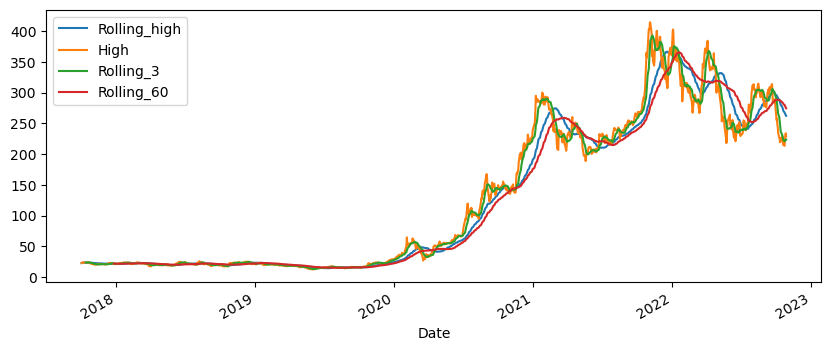

In [4]:
tsla_data["Rolling_3"]= tsla_data[["High"]].rolling(window=10).mean()
tsla_data["Rolling_60"]= tsla_data[["High"]].rolling(window=60).mean()
tsla_data['Rolling_high'] = tsla_data[["High"]].rolling(window=40, min_periods=1).mean()

tsla_data[['Rolling_high', 'High', "Rolling_3", "Rolling_60"]].plot(figsize=(10, 4))

<Axes: xlabel='Date'>

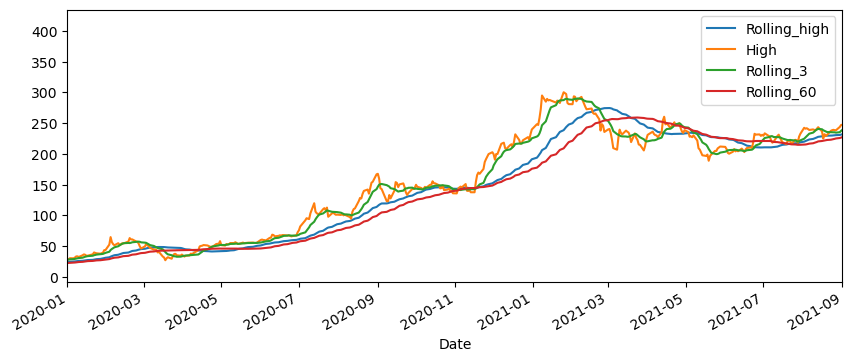

In [5]:
tsla_data[['Rolling_high', 'High', "Rolling_3","Rolling_60"]].plot(xlim=['2020-01-01', '2021-09-01'],figsize=(10, 4))

### Cumulative Moving Average

<Axes: xlabel='Date'>

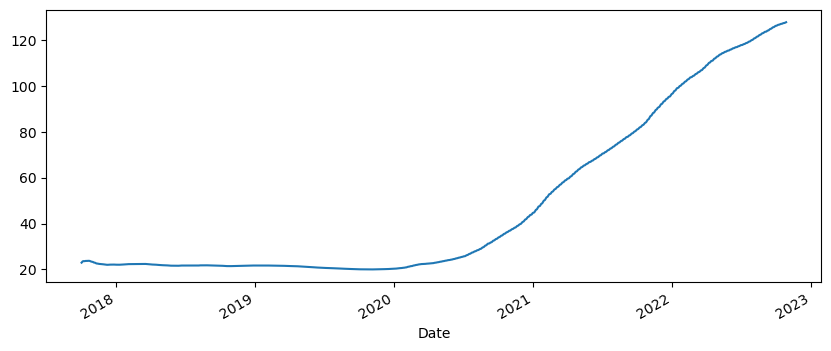

In [6]:
tsla_data["High"].expanding(min_periods=1).mean().plot(figsize=(10, 4))

### Exponential moving average And Exponential weighted moving average

<Axes: xlabel='Date'>

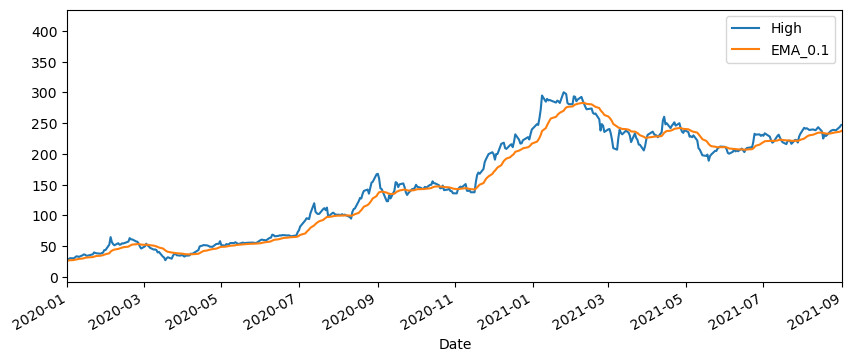

In [7]:
tsla_data["EMA_0.1"] = tsla_data["High"].ewm(alpha=0.1, adjust=False).mean()

tsla_data[["High", "EMA_0.1"]].plot(xlim=['2020-01-01', '2021-09-01'],figsize=(10, 4))

<Axes: xlabel='Date'>

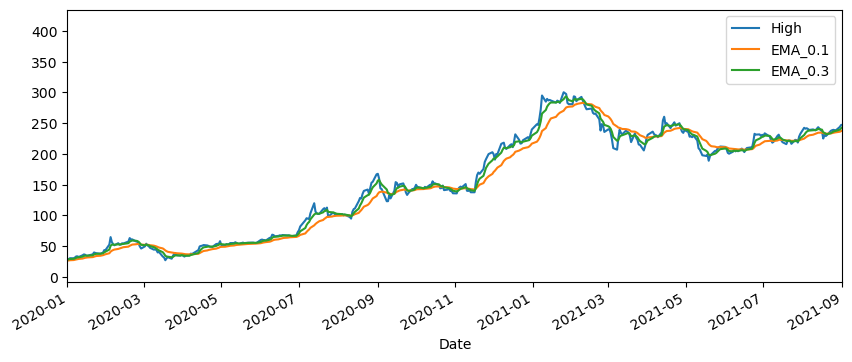

In [8]:
tsla_data["EMA_0.3"] = tsla_data["High"].ewm(alpha=0.3, adjust=False).mean()

tsla_data[["High", "EMA_0.1", "EMA_0.3"]].plot(xlim=['2020-01-01', '2021-09-01'],figsize=(10, 4))

<Axes: xlabel='Date'>

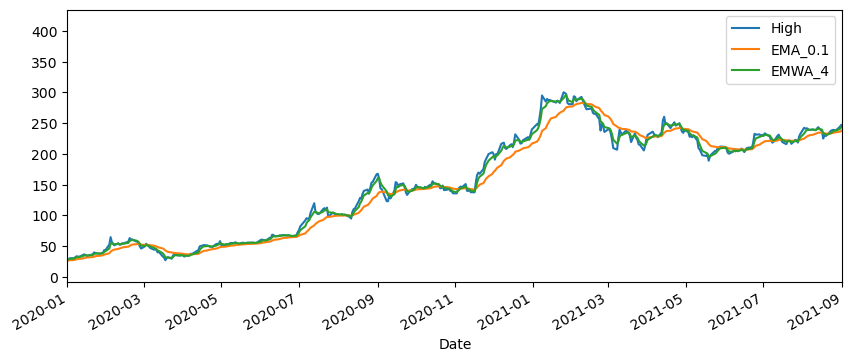

In [12]:
tsla_data["EMWA_4"] = tsla_data["High"].ewm(span=4, adjust=False).mean()

tsla_data[["High", "EMA_0.1", "EMWA_4"]].plot(xlim=['2020-01-01', '2021-09-01'],figsize=(10, 4))